In [2]:
import numpy as np

class Universe:
    def __init__(self, character_type):
        self.character_type = character_type
        self.black_holes = self.form_black_holes()

    def form_black_holes(self):
        # For simplicity, let's assume the number of black holes formed is a function of the character type
        return int(np.sum(self.character_type))

    def produce_daughter_universe(self):
        # The daughter universe inherits the character type with some variation
        new_character_type = self.character_type + np.random.normal(0, 0.1, len(self.character_type))
        return Universe(new_character_type)


class Multiverse:
    def __init__(self, initial_universes):
        self.generations = [initial_universes]

    def next_generation(self):
        new_generation = []
        for universe in self.generations[-1]:
            for _ in range(universe.black_holes):
                new_generation.append(universe.produce_daughter_universe())
        self.generations.append(new_generation)

mv = Multiverse([Universe(np.random.normal(0, 1, 10))])

for _ in range(10):
    mv.next_generation()
    print(len(mv.generations[-1]))

2
4
8
17
35
79
184
459
1213
3334


In [3]:
import matplotlib.pyplot as plt

# Initialize parameters
num_runs = 1000
num_generations = 5

# Initialize a list to store the number of universes in each generation for each run
num_universes = []

# Run the simulations
for _ in range(num_runs):
    print('Run: {}'.format(_))
    mv = Multiverse([Universe(np.random.normal(0, 1, 10))])
    num_universes_run = []
    for _ in range(num_generations):
        mv.next_generation()
        num_universes_run.append(len(mv.generations[-1]))
    num_universes.append(num_universes_run)

num_universes = np.array(num_universes)
print(num_universes.shape)

Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
Run: 100
Run: 101
Run: 102
Run: 103
Run: 104
Run: 105
Run: 106
Run: 107
Run: 108
Run: 109
Run: 110
Run: 111
Run: 112
Run: 113
Run: 114
Run: 115
Run: 116
Run: 117
Run: 118
Run: 119
Run: 120
Run: 121
Run: 122
Run

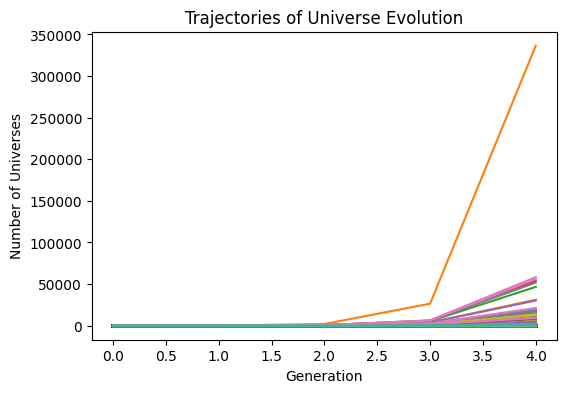

In [25]:

plt.figure(figsize=(6, 4))
for i in range(num_runs):
    plt.plot(range(num_generations), num_universes[i])

plt.xlabel('Generation')
plt.ylabel('Number of Universes')
plt.title('Trajectories of Universe Evolution')
#plt.yscale('log')
plt.show()
#plt.savefig('universe_evolution.png')


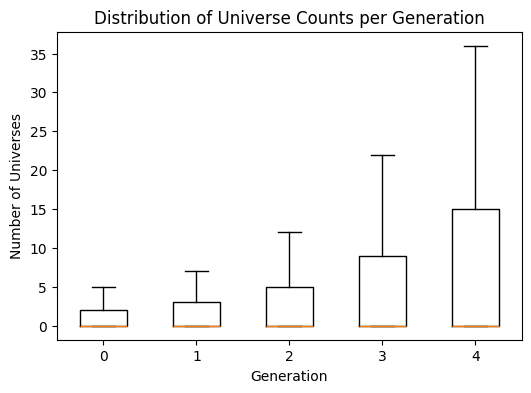

In [23]:
# Convert the list of lists into a transposed list of lists
# where each sublist contains all universe counts for a single generation
transposed_num_universes = list(map(list, zip(*num_universes)))

# Create a boxplot for each generation
plt.figure(figsize=(6, 4))
plt.boxplot(transposed_num_universes, positions=range(num_generations), showfliers=False)
plt.xlabel('Generation')
plt.ylabel('Number of Universes')
plt.title('Distribution of Universe Counts per Generation')
plt.xticks(range(num_generations))
plt.show()

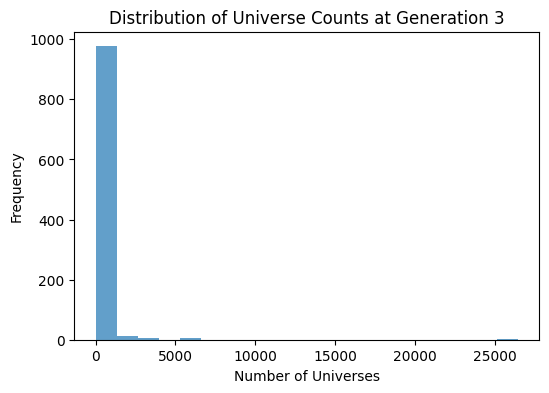

In [22]:
generation_to_visualize = 3 

# Create a histogram for the chosen generation
plt.figure(figsize=(6, 4))
plt.hist(num_universes[:,generation_to_visualize], bins=20, alpha=0.7)
plt.xlabel('Number of Universes')
plt.ylabel('Frequency')
plt.title(f'Distribution of Universe Counts at Generation {generation_to_visualize}')
plt.show()

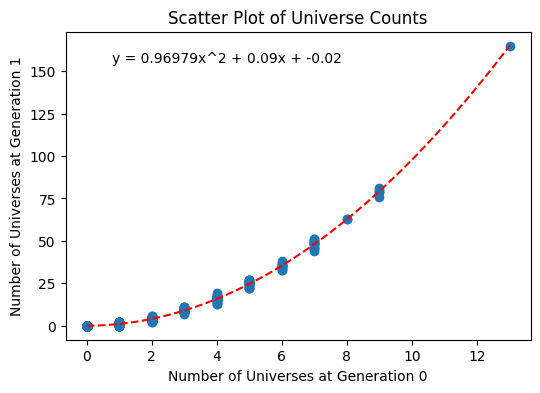

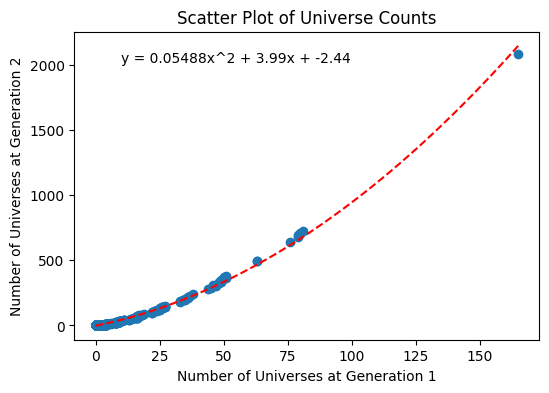

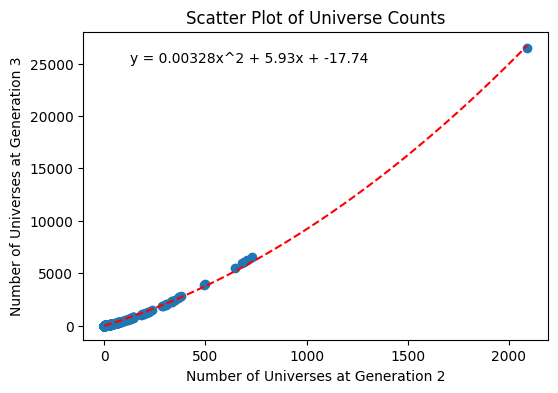

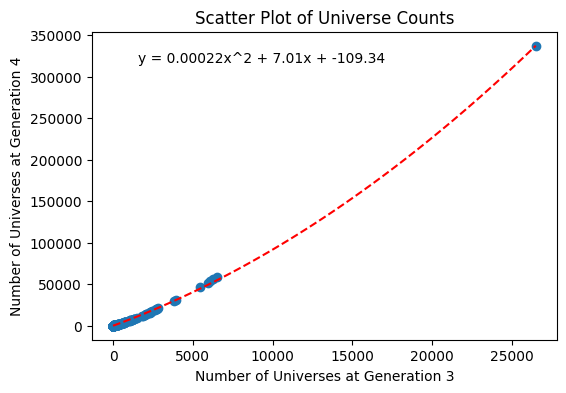

In [18]:
zs = []

for n_gen in range(num_generations-1):
    plt.figure(figsize=(6, 4))
    plt.scatter(num_universes[:,n_gen], num_universes[:,n_gen+1])
    plt.xlabel('Number of Universes at Generation {}'.format(n_gen))
    plt.ylabel('Number of Universes at Generation {}'.format(n_gen+1))
    plt.title('Scatter Plot of Universe Counts')

    z = np.polyfit(num_universes[:,n_gen], num_universes[:,n_gen+1], 2)
    zs.append(z)
    p = np.poly1d(z)
    xp = np.linspace(min(num_universes[:,n_gen]), max(num_universes[:,n_gen]), 100)
    plt.text(0.1, 0.9, 'y = {:.5f}x^2 + {:.2f}x + {:.2f}'.format(z[0], z[1], z[2]), transform=plt.gca().transAxes)
    plt.plot(xp, p(xp), "r--")
    plt.show()

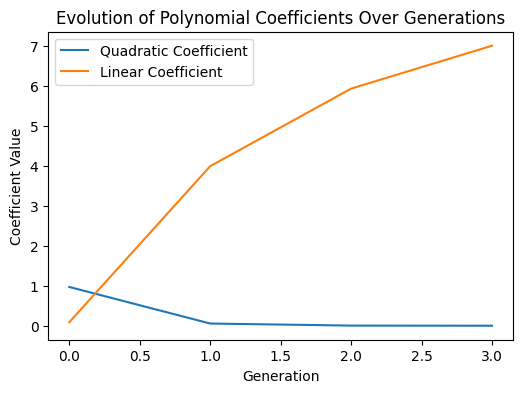

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(range(num_generations-1), [z[0] for z in zs], label='Quadratic Coefficient')
plt.plot(range(num_generations-1), [z[1] for z in zs], label='Linear Coefficient')
#plt.plot(range(num_generations-1), [z[2] for z in zs], label='Constant Term')
plt.xlabel('Generation')
plt.ylabel('Coefficient Value')
plt.title('Evolution of Polynomial Coefficients Over Generations')
plt.legend()
plt.show()
